# Break historical data per log basis

- Author: Benazir de la Rosa
- Contact: benazir.delarosa@gmail.com

In [5]:
import os
import yaml
file = open("C:\\Users\\g1238\\Documents\\tcs_hackaton\\data\\garage_doors\\IoT_normal_Garage_door_1.log","r")
lines = file.readlines()
def opener(path, flags):
    return os.open(path, flags, 0o777)
os.umask(0)


0

In [6]:
for i in range(len(lines)):
    os.umask(0)
    with open(os.open(f"C:\\Users\\g1238\\Documents\\tcs_hackaton\\data\\garage_doors\\garage_door_1\\IoT_normal_Garage_door_1_part_{i}.log", os.O_CREAT | os.O_WRONLY, 0o777),"w",opener=opener) as f:
        f.write(lines[i])
    f.close()

# Mimic Electronic Device Signal Emition

In [7]:
import os

abs_path = os.path.abspath("data/garage_doors/garage_door_1")
paths = os.listdir(abs_path)

In [8]:
from shutil import copyfile
import time
for i in range(len(paths)):
    time.sleep(0.3)
    src_file = abs_path + '\\' + paths[i]
    dst_file = abs_path.replace("garage_door_1", "garage_door_1_data_send") + '\\' + paths[i]  
    copyfile(src_file, dst_file)
    print("copied file: " + src_file)
       

copied file: c:\Users\g1238\Documents\tcs_hackaton\data\garage_doors\garage_door_1\IoT_normal_Garage_door_1_part_0.log
copied file: c:\Users\g1238\Documents\tcs_hackaton\data\garage_doors\garage_door_1\IoT_normal_Garage_door_1_part_1.log
copied file: c:\Users\g1238\Documents\tcs_hackaton\data\garage_doors\garage_door_1\IoT_normal_Garage_door_1_part_10.log
copied file: c:\Users\g1238\Documents\tcs_hackaton\data\garage_doors\garage_door_1\IoT_normal_Garage_door_1_part_100.log
copied file: c:\Users\g1238\Documents\tcs_hackaton\data\garage_doors\garage_door_1\IoT_normal_Garage_door_1_part_1000.log
copied file: c:\Users\g1238\Documents\tcs_hackaton\data\garage_doors\garage_door_1\IoT_normal_Garage_door_1_part_10000.log
copied file: c:\Users\g1238\Documents\tcs_hackaton\data\garage_doors\garage_door_1\IoT_normal_Garage_door_1_part_10001.log
copied file: c:\Users\g1238\Documents\tcs_hackaton\data\garage_doors\garage_door_1\IoT_normal_Garage_door_1_part_10002.log
copied file: c:\Users\g1238\Do

KeyboardInterrupt: 

# Data Visualization Dev

In [ ]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
import json

def get_data(path):
    list_viz = os.listdir(data_fridge_1_temperature)
    dfs = []
    for item in list_viz:
        print(item)
        dfs.append(pd.read_csv(data_fridge_1_temperature + item, sep='\t'))
    df_final = pd.concat(dfs)
    df_final = df_final.drop(columns=['Unnamed: 0'])
    df_final['date'] = pd.to_datetime(df_final['date'])
    return df_final

    

In [56]:
def encode_sparkplug_b(string_text,object_type, read_attribute):
    """
    This function prepares the

    :param string_text: text from emulated device
    :returns message: sparkplug b prepare text to be encoded
    """
    dict_string = json.loads(string_text)
    message = {
        "metrics":[{
            "name":object_type,
            "alias":22,
            "datatype":9,
            "isNull":False,
            "floatValue":1
        }],
        "seq":-1
    }
    return dict_string[read_attribute]

In [57]:
path = "C:/Users/g1238/Documents/tcs_hackaton/data/garage_doors/garage_door_1_data_send/IoT_normal_garage_door_1_part_0.log"
contents = Path(path).read_text()
contents

'{"id":5,"device title":"Garage Door","door state":false,"door state text":"Garage door closed","sphone signal":false}\n'

In [58]:
contents
device_name = config['tcs_hackaton']['device_name']['Garage_Door'][0]
attribute_to_measure = "door state"

In [59]:
json.loads(contents)

{'id': 5,
 'device title': 'Garage Door',
 'door state': False,
 'door state text': 'Garage door closed',
 'sphone signal': False}

In [60]:
encode_sparkplug_b(contents, device_name,attribute_to_measure)

False

In [ ]:
ast.literal_eval(contents)

ValueError: malformed node or string: <ast.Name object at 0x000001B245F37E50>

### Get last data read from actuators and sensors

In [6]:
import glob
import os.path

folder_path = r'C:\\Users\\g1238\Documents\\tcs_hackaton\data\\fridges\\fridge_1_data_send\\'
file_type = r'\*type'
files = glob.glob(folder_path + file_type)
max_file = max(files, key=os.path.getctime)

print(max_file)

ValueError: max() arg is an empty sequence

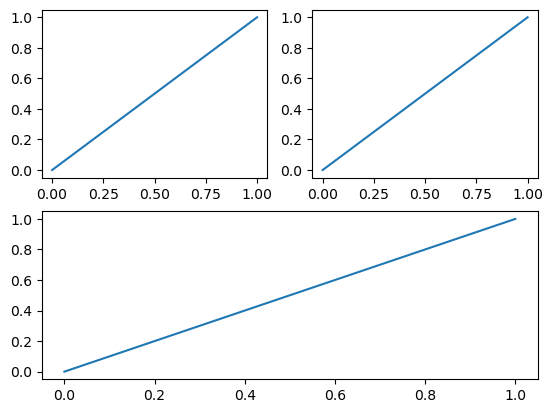

In [7]:
import numpy as np
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec

# Create 2x2 sub plots
gs = gridspec.GridSpec(2, 2)

fig_with_info = pl.figure()
ax = pl.subplot(gs[0, 0]) # row 0, col 0
pl.plot([0,1])

ax = pl.subplot(gs[0, 1]) # row 0, col 1
pl.plot([0,1])

ax = pl.subplot(gs[1, :]) # row 1, span all columns
pl.plot([0,1])

In [8]:
import mpld3
html_str = mpld3.fig_to_html(fig_with_info)
Html_file= open("index.html","w")
Html_file.write(html_str)
Html_file.close()